In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# association Lib

from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
from mlxtend.preprocessing import TransactionEncoder

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
movies = pd.read_csv('my_movies.csv')

In [6]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
movie_df = movies.iloc[:,5:]

In [8]:
movie_df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [9]:
# Data

for i in movie_df.columns:
    print(i)
    print(movie_df[i].value_counts())
    print()


Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



# Apriori Algorithm 

### Association Rule : Support - 10% & Lift > 1

In [10]:
frequent_items = apriori(movie_df,min_support=0.10,use_colnames=True)

In [11]:
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [12]:
rules = association_rules(frequent_items,min_threshold=1,metric = 'lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR1),"(Harry Potter1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Sixth Sense),"(LOTR1, LOTR2, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
236,(Harry Potter1),"(LOTR1, LOTR2, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [13]:
rules.shape

(238, 9)

In [ ]:
# sorting based on lift values - top 20

In [14]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
202,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
187,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
95,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
128,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
200,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
133,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
136,(LOTR),"(Gladiator, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
143,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [15]:
rules[rules['lift']>8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
95,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
98,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
125,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
128,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
133,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
136,(LOTR),"(Gladiator, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
143,"(LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
144,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
145,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
146,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [16]:
rules.sort_values('confidence',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
119,"(Harry Potter1, Green Mile)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf
167,"(LOTR1, LOTR2, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
155,"(Harry Potter1, Sixth Sense, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
92,(Braveheart),"(Gladiator, Patriot)",0.1,0.6,0.1,1.0,1.666667,0.04,inf
156,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
90,"(Braveheart, Patriot)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
157,"(LOTR1, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.000000,0.08,inf
88,"(Gladiator, Braveheart)",(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf
158,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
86,(LOTR),"(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.000000,0.08,inf


Text(0, 0.5, 'lift')

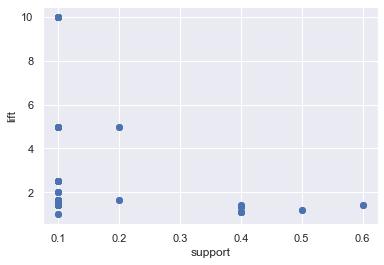

In [17]:
# visualization of obtained rule

plt.scatter(rules['support'],rules['lift'])
plt.xlabel('support')
plt.ylabel('lift')


### Association Rules with 10% Support and 70% confidence

In [18]:
frequent_item = apriori(movie_df,min_support=0.1,use_colnames=True)

In [19]:
rule_7 = association_rules(frequent_item,min_threshold=0.7,metric = 'confidence')

rule_7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
124,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [20]:
rule_7.shape

(129, 9)

Text(0, 0.5, 'confidence')

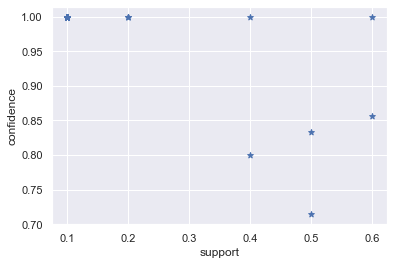

In [21]:
# visualization of obtained rule

plt.scatter(rule_7['support'],rule_7['confidence'],marker='*')
plt.xlabel('support')
plt.ylabel('confidence')


### Association Rules with 5% Support and 90% confidence

In [22]:
frequent_item = apriori(movie_df,min_support=0.05,use_colnames=True)

In [23]:
rule_9 = association_rules(frequent_item,min_threshold=0.9,metric = 'confidence')

rule_9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(LOTR1, Sixth Sense)","(Harry Potter1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Harry Potter1, Sixth Sense)","(LOTR1, LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [24]:
rule_9.shape

(125, 9)

Text(0, 0.5, 'confidence')

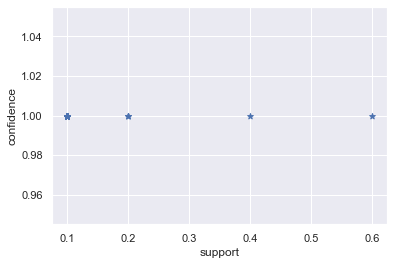

In [25]:
# visualization of obtained rule

plt.scatter(rule_9['support'],rule_9['confidence'],marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
